In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras import backend as K

In [3]:
def jacard_coef(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [4]:
def dataGenerator_test(batchSize,path_images):
    while True:
        imgs_arr = np.zeros((batchSize, 256, 256, 3), dtype = np.float32)
        image_list = os.listdir(path_images)
        for i in range(batchSize):
            image_name = random.choice(image_list)
            img = load_img(os.path.join(path_images,image_name), target_size = (256, 256, 3))
            imgs_arr[i] = img
            imgs_arr[i] = imgs_arr[i] / 255
        yield imgs_arr

In [5]:
model = tf.keras.models.load_model('../input/model-coco-unet-segm-epoch-21/model_coco_epoch_21',
                                   custom_objects={'jacard_coef':jacard_coef,'jacard_coef_loss':jacard_coef_loss})

2022-06-25 03:32:11.410937: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
path_images = '../input/coco-2017-dataset/coco2017/test2017'
for x in dataGenerator_test(15,path_images):
    break

2022-06-25 03:32:20.270583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


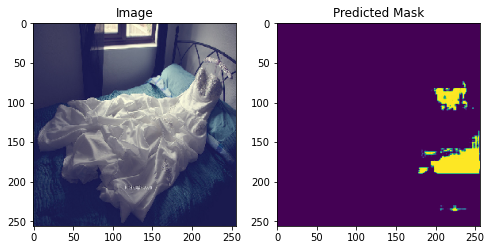

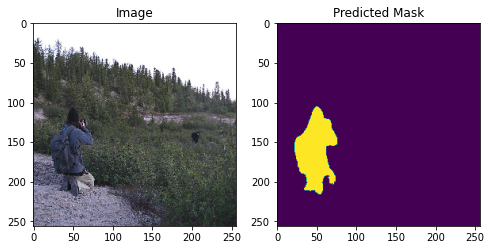

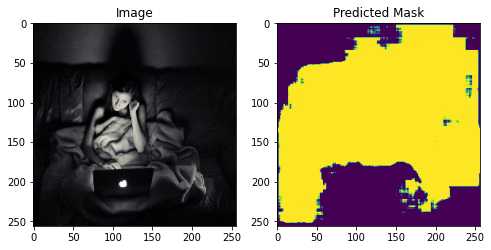

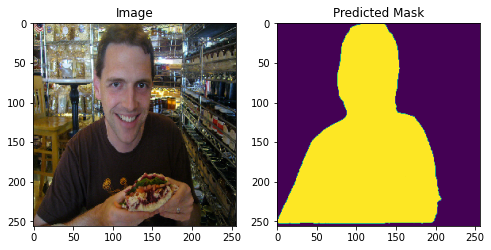

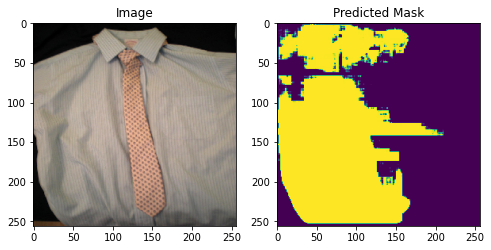

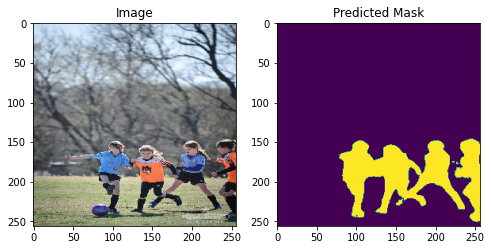

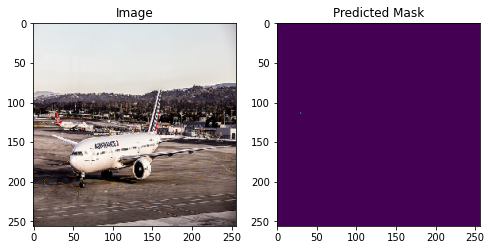

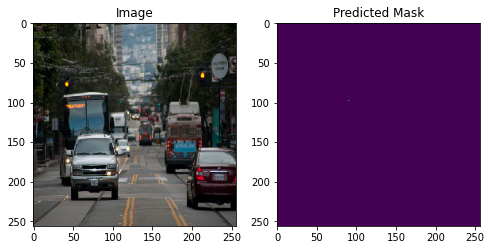

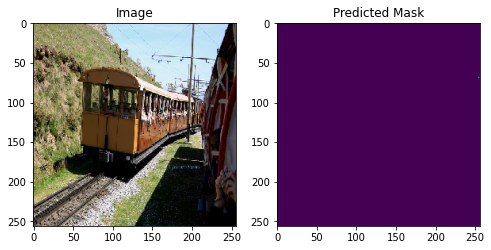

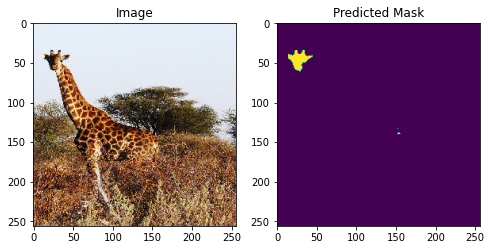

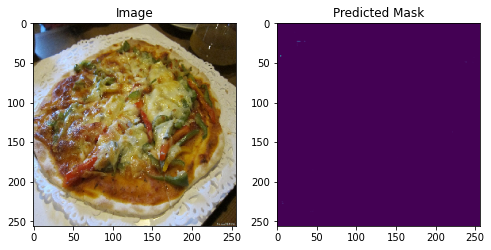

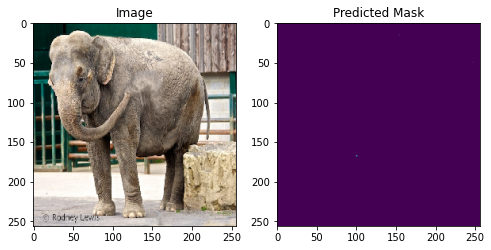

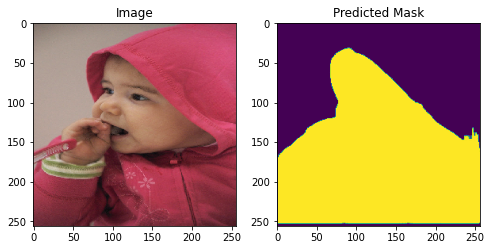

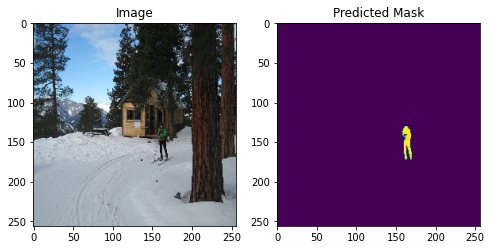

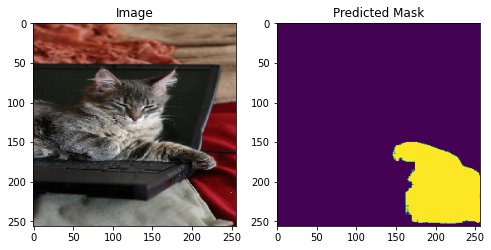

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
for index in range(15):
    plt.figure(figsize=(8,16))
    pred = model.predict(x[index].reshape((1, 256, 256,3)))
    plt.subplot(1,2,1)
    plt.title('Image')
    plt.imshow(array_to_img(x[index]))
    plt.subplot(1,2,2)
    plt.title('Predicted Mask')
    plt.imshow(array_to_img(pred.reshape((256, 256, 1))))